In [2]:
import pandas as pd

def read_results(filepath):
  df = pd.read_csv(filepath)
  results = {}
  for i in range(len(df)):
    algo = f'{df.loc[i, "Algorithm"]}'
    if not pd.isnull(df.loc[i, "Initialization"]):
      algo += f'-{df.loc[i, "Initialization"]}'
    results[algo] = [int(s) for s in df.loc[i, "Results"].split(',')]
  return results

In [80]:
# data = read_results('230n0-230-n1-30000m.csv')
data = read_results('1000n0-1000n1-80000m.csv')


In [42]:
import matplotlib.pyplot as plt
from itertools import chain

def boxplot(name, results):
  fig = plt.figure(figsize=(10, 7))
  
  ax = fig.add_axes([0, 0, 1, 1])

  ax.set_title(name)
  ax.boxplot(list(results.values()))
  ax.set_xticklabels(results.keys())
  plt.show()

def boxplot_filtered(name, results):
  filter_results = {
    'SA-Barry': results['SA-Barry'],
    'GA-Barry': results['GA-Barry'],
    'SA-Jump': results['SA-Jump'],
  }
  all_values = list(chain(*[v for v in filter_results.values()]))
  
  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_axes([0, 0, 1, 1])
  ax.set_title(name)
  ax.boxplot(list(filter_results.values()))
  ax.set_xticklabels(filter_results.keys())
  # plt.ylim(min(all_values) - 1, max(all_values) + 1)
  # plt.yticks(range(1360000000, 1380000000, 100000))
  plt.show()

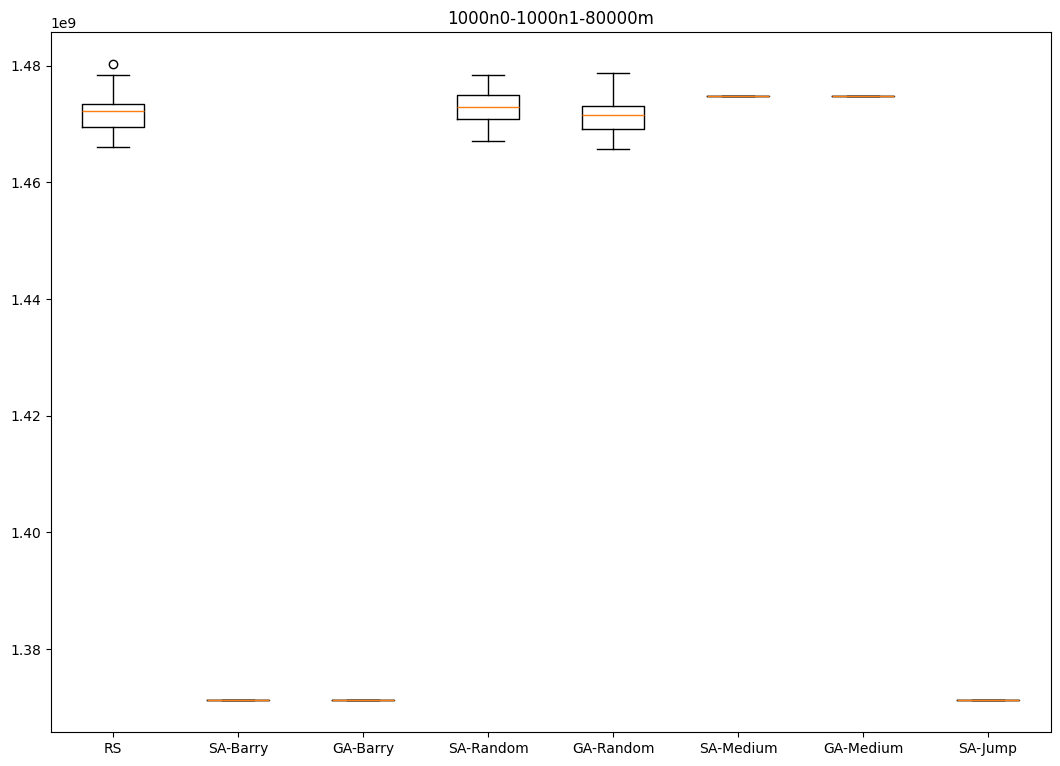

In [81]:
# boxplot('230n0-230-n1-30000m', data)
boxplot('1000n0-1000n1-80000m', data)

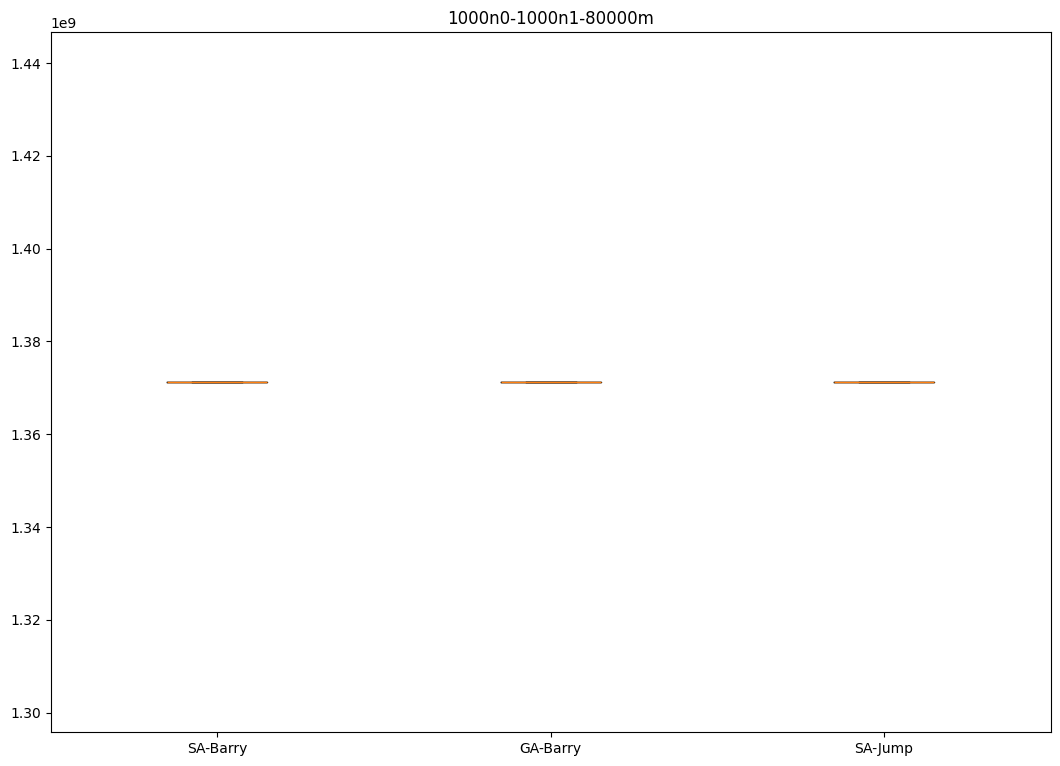

In [82]:
# boxplot_filtered('230n0-230-n1-30000m', data)
boxplot_filtered('1000n0-1000n1-80000m', data)

In [75]:
from scipy.stats import mannwhitneyu


def a12(lst1,lst2,rev=True):
  "how often is x in lst1 more than y in lst2?"
  more = same = 0.0
  for x in lst1:
    for y in lst2:
      if x==y:
        same += 1
      elif rev and x > y:
        more += 1
      elif not rev and x < y : more += 1
  return (more + 0.5*same) / (len(lst1)*len(lst2))


def analyze(baseline, algo, result):
  mannwhitneyu_result = mannwhitneyu(result[baseline], result[algo])[1]
  a12_result = a12(result[baseline], result[algo], rev=True)
  return mannwhitneyu_result, a12_result


In [84]:
# baselines = {'RS', 'ILP'}
baselines = {'RS'}

non_baseline = [algo for algo in data.keys() if algo not in baselines]
mannwhitneyu_results = {}
a12_results = {}
for baseline in baselines:
  mannwhitneyu_results[baseline] = {}
  a12_results[baseline] = {}
  for algo in non_baseline:
    res = analyze(baseline, algo, data)
    mannwhitneyu_results[baseline][algo] = res[0]
    a12_results[baseline][algo] = res[1]


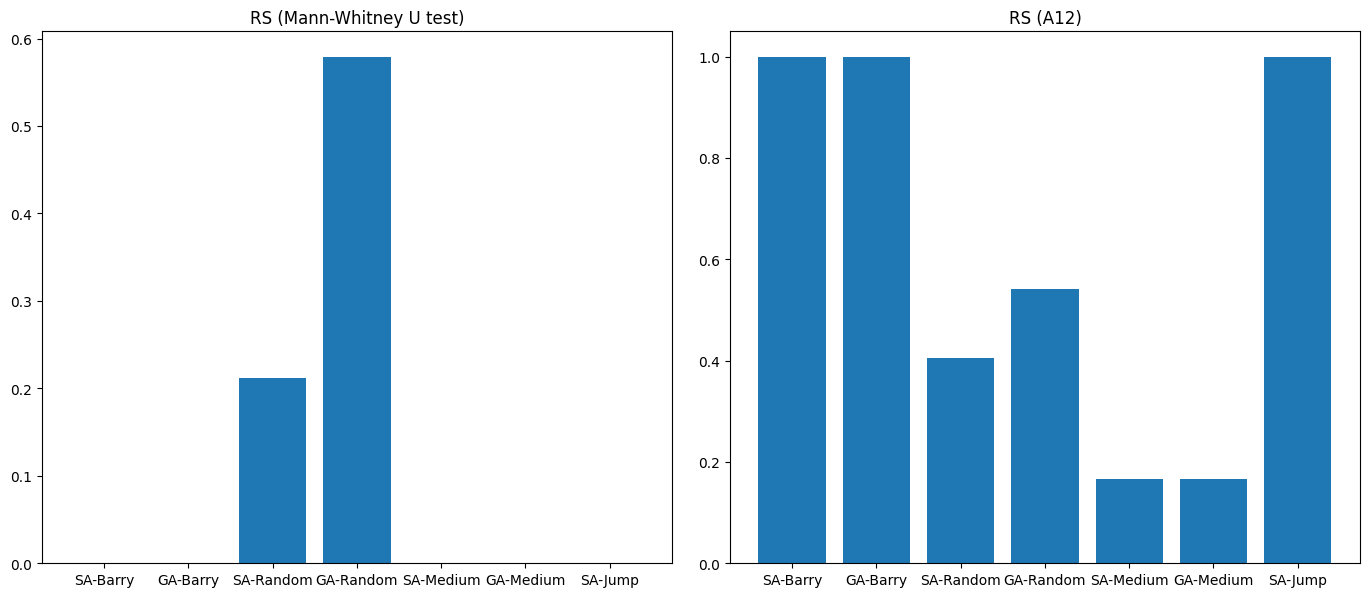

In [85]:
def plot_statistical_test(baseline):
  fig, ax = plt.subplots(1, 2, figsize=(15, 7))
  fig.tight_layout(pad=5.0, w_pad=1.08)

  ax[0].set_title(f"{baseline} (Mann-Whitney U test)")
  ax[0].bar(mannwhitneyu_results[baseline].keys(), mannwhitneyu_results[baseline].values())

  ax[1].set_title(f"{baseline} (A12)")
  ax[1].bar(a12_results[baseline].keys(), a12_results[baseline].values())

# plot_statistical_test('ILP')
plot_statistical_test('RS')

In [39]:
import subprocess
def run_process(exec, file, time, algorithm, repetitions=1, population_size=20):
    return subprocess.run([exec, '-f', file, '-r', str(repetitions), '-t', str(time), '-a', algorithm, '-s', str(population_size)], capture_output=True)
exec = "./build/mincrossing-barry" 
algorithm = "GA" 
time = 20000
filename = "./1000n0-1000n1-80000m.gr"
run_process(exec, filename, time, algorithm)

CompletedProcess(args=['./build/mincrossing-barry', '-f', './1000n0-1000n1-80000m.gr', '-r', '1', '-t', '20000', '-a', 'GA', '-s', '20'], returncode=1, stdout=b'Repetition: 1\n1371205632\nMax: 1371205632\nAverage: 1.37121e+09\nMin: 1371205632\nLower bound: 1370942506\n', stderr=b'')

In [40]:
exec = "./build/mincrossing-barry" 
algorithm = "GA" 
time = 20000
filename = "./1000n0-1000n1-80000m.gr"
repetitions = 2
run_process(exec, filename, time, algorithm, repetitions)

CompletedProcess(args=['./build/mincrossing-barry', '-f', './1000n0-1000n1-80000m.gr', '-r', '2', '-t', '20000', '-a', 'GA', '-s', '20'], returncode=1, stdout=b'Repetition: 1\nRepetition: 2\n1371205632,1371205632\nMax: 1371205632\nAverage: -7.76278e+08\nMin: 1371205632\nLower bound: 1370942506\n', stderr=b'')